# **Analyzing Global Tuberculosis Trends and Financial Impact**
Contributors: Adesina Adeniran, Barrett Ratzlaff, Chaitali Deshmukh, Jyun-Ru Huang, Shreya Lodha, Tharfeed Ahmed Unus


### **a. Project Proposal**
**Problem Definition:** According to the World Health Organization (WHO), tuberculosis (TB) is an infectious disease that most often affects the lungs and is caused by a type of bacteria. We are interested in identifying common trends between countries with recorded tuberculosis data, as submitted to the WHO. We plan to investigate trends within budget and expenditures between similar countries (in terms of region). Through our analysis, we aim to create recommendations to reduce costs, inefficiencies, and number of TB cases.

**Our Data Source:** https://www.who.int/teams/global-tuberculosis-programme/data#csv_files

The specific csv files we plan to investigate include the following:

- WHO TB burden estimates
- Treatment outcomes by age group and sex
- Budgets for TB since fiscal year 2018
- Expenditure and utilization of health services for TB since fiscal year 2017
- Community engagement activities for TB
- Ministry involvement in efforts to fight TB

**Motivation:** Despite being a preventable and curable disease, TB still negatively impacts a significant population, most of which tend to be in low and middle income countries. About a quarter of the global population is estimated to have been infected with TB bacteria. About 5–10% of people infected with TB will eventually get symptoms and develop TB disease. Understanding the costs involved/historical investment and how that has translated to outcomes in various regions can be key in identifying areas of improvement.


### **b. Executive Summary**

The primary objective of our analysis is to assess factors like resource allocation, treatment effectiveness, and incidence rate to provide data driven recommendations to public health officials to aid them in their ongoing fight against tuberculosis. Our team employed various data cleaning methods to prepare our dataset for analysis, including filling null values, dropping redundant columns, and joining applicable tables. Through our analysis, we found that the highest TB incidence rates were mainly in Africa, the Western Pacific, and Southeast Asia. Interestingly, we saw that countries in the most affected regions typically spend much less than the budget they require to effectively implement their response to tuberculosis cases. This indicates that there is room for improvement when it comes to resource allocation and fighting tuberculosis. We also studied the changes in basic engagement units across different regions and countries. By comparing these changes with each country's TB incidence and mortality rates, we found that an increase in basic engagement units was negatively correlated with TB incidence rates, especially in Africa.

## **c. Data Dictionary**

Column | Description | Data Type
------ | ----------- | ---------
**budget_tot** | Total budget required (US Dollars) | ``str``
**bmu** | Number of TB Basic Management Units in the country | ``float``
**bmu_community_impl** | Number of TB Basic Management Units which implemented community-based referrals or any form of community treatment adherence support | ``str``
**bmu_ref_data** | Number of Basic Management Units with data on referrals by community health workers / community volunteers | ``str``
**bmu_rxsupport_data** | Number of Basic Management Units with data on community treatment adherence support | ``float``
**bmu_rxsupport_data_coh** | Total number of patients who started TB treatment in the Basic Management Units with data on community treatment adherence support | ``float``
**notified_ref** | Total number of new and relapse TB cases notified in the Basic Management Units with data on referrals by community health workers | ``float``
**notified_ref_community** | Total number of new and relapse TB cases referred by community health workers / community volunteers in the Basic Management Units with data on referrals by community health workers | ``float``
**rxsupport_community_coh** | Total number of patients who started TB treatment and who received any form of treatment adherence support from community health workers / community volunteers in the Basic Management Units with data on community treatment adherence support | ``float``
**rxsupport_community_succ** | Total number of patients who were cured or who completed treatment among the cases who started TB treatment and who received any form of treatment adherence support from community health workers / community volunteers in the Basic Management Units with data on community treatment adherence support | ``float``
**country** | Country or territory name | ``str``
**g_whoregion** | WHO region (AFR=Africa; AMR=Americas; EMR=Eastern Mediterranian; EUR=Europe; SEA=South-East Asia; WPR=Western Pacific) | ``str``
**age_group** | Age group (in years) (0-4=0-4 years; 5-14=5-14 years; 15-24=15-24 years ..etc; 15plus=15 years and above; 65plus=65 years and above; all=All ages;) | ``str``
**e_inc_100k** | Estimated incidence (all forms) per 100 000 population | ``float``
**e_mort_100k** | Estimated mortality of TB cases (all forms) per 100 000 population | ``float``
**exp_tot** | Total actual expenditure (US Dollars) | ``float``
**died** | Outcomes: died | ``float``
**fail** | Outcomes: treatment failed | ``float``
**lost** | Outcomes:  lost to follow up | ``float``
**succ** | Outcomes: treatment success (Cured or treatment completed) | ``float``
**tsr** | Treatment success rate as a percentage | ``float``
**min_agg_collab** | How is the ministry of agriculture or its equivalent  engaged in the national TB response? (2=Not applicable; 6=Not engaged; 230=Advocacy information education and communication; 231=TB prevention and care; 232=Patient support including economic social or nutritional benefits) | ``float``
**min_def_collab** | How is the ministry of defence or its equivalent  engaged in the national TB response? (2=Not applicable; 6=Not engaged; 230=Advocacy information education and communication; 231=TB prevention and care; 232=Patient support including economic social or nutritional benefits) | ``float``
**min_dev_collab** | How is the ministry of social development or its equivalent  engaged in the national TB response? (2=Not applicable; 6=Not engaged; 230=Advocacy information education and communication; 231=TB prevention and care; 232=Patient support including economic social or nutritional benefits) | ``float``
**min_edu_collab** | How is the ministry of education or its equivalent  engaged in the national TB response? (2=Not applicable; 6=Not engaged; 230=Advocacy information education and communication; 231=TB prevention and care; 232=Patient support including economic social or nutritional benefits) | ``float``
**min_fin_collab** | How is the ministry of finance or its equivalent  engaged in the national TB response? (2=Not applicable; 6=Not engaged; 230=Advocacy information education and communication; 231=TB prevention and care; 232=Patient support including economic social or nutritional benefits) | ``float``
**min_jus_collab** | How is the ministry of justice or its equivalent  engaged in the national TB response? (2=Not applicable; 6=Not engaged; 230=Advocacy information education and communication; 231=TB prevention and care; 232=Patient support including economic social or nutritional benefits) | ``float``
**min_lab_collab** | How is the ministry of labour or its equivalent  engaged in the national TB response? (2=Not applicable; 6=Not engaged; 230=Advocacy information education and communication; 231=TB prevention and care; 232=Patient support including economic social or nutritional benefits) | ``float``
**min_tra_collab** | How is the ministry of transport or its equivalent  engaged in the national TB response? (2=Not applicable; 6=Not engaged; 230=Advocacy information education and communication; 231=TB prevention and care; 232=Patient support including economic social or nutritional benefits) | ``float``


In [67]:
# importing all packages and libraries needed for the rest of the notebook
!pip install plotly_express -q
import plotly_express as px
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# reading all the files that will be used in the project
expenditures = pd.read_csv("https://extranet.who.int/tme/generateCSV.asp?ds=expenditure_utilisation")
ddictionary = pd.read_csv("https://extranet.who.int/tme/generateCSV.asp?ds=dictionary")
budgets = pd.read_csv("https://extranet.who.int/tme/generateCSV.asp?ds=budget")
outcomes = pd.read_csv("https://extranet.who.int/tme/generateCSV.asp?ds=outcomes_age_sex")
burden_estimates = pd.read_csv("https://extranet.who.int/tme/generateCSV.asp?ds=estimates")
community_engagement = pd.read_csv('https://extranet.who.int/tme/generateCSV.asp?ds=community')
unhlm_commitments = pd.read_csv('https://extranet.who.int/tme/generateCSV.asp?ds=unhlm')
ddictionary = ddictionary.drop(columns = "code_list")
ddictionary = ddictionary.set_index("variable_name")

#**1. Cleaning**

Each file has null values that need to be addressed and columns that can be removed for our purposes. The following section addresses this.

## **1a. Burden Estimates**
First, we remove all columns in burden_estimates that contain values that are the "upper bound" and "lower bound" estimates of other columns. The estimates' middle value will suffice for our analysis.

Separately, we also remove columns with TB case estimates amongst patients with HIV. TB estimate columns already include such cases and we are interested in finding insights that will help both groups.

We also remove 2 of the identifying classifiers for the country as there are already four total in the dataset.

In [69]:
# cleaning
# removal of columns from burden_estimates that are not relevant to the analysis
burden_estimates.drop(columns=['iso2', 'iso_numeric', 'e_inc_100k_lo', 'e_inc_100k_hi', 'e_inc_num_lo', 'e_inc_num_hi', 'e_tbhiv_prct', 'e_tbhiv_prct_lo',
                               'e_tbhiv_prct_hi', 'e_inc_tbhiv_100k', 'e_inc_tbhiv_100k_lo', 'e_inc_tbhiv_100k_hi', 'e_inc_tbhiv_num',
                               'e_inc_tbhiv_num_lo', 'e_inc_tbhiv_num_hi', 'e_mort_exc_tbhiv_100k', 'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi',
                               'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo', 'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k',
                               'e_mort_tbhiv_100k_lo', 'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo', 'e_mort_tbhiv_num_hi', 'e_mort_100k_lo',
                               'e_mort_100k_hi', 'e_mort_num_lo', 'e_mort_num_hi', 'cfr_lo', 'cfr_hi', 'cfr_pct_lo', 'cfr_pct_hi', 'c_cdr_lo', 'c_cdr_hi'],
                      inplace=True)

# sort the DataFrame by 'iso3' and 'year'
burden_estimates.sort_values(by=['iso3', 'year'], inplace=True)

# fill null values using forward fill and backward fill
for column in ['cfr', 'cfr_pct', 'c_newinc_100k', 'c_cdr']:
    # backward fill and then forward fill
    burden_estimates[column] = burden_estimates[column].bfill().ffill()

## **1b. Expenditures and Budgets**
Because we are targeting three columns in the budget csv file due to high null values in other columns, we will merge these files into one dataframe. We also merge with the burden.csv to more easily compare expenditures with the TB rates around the globe.

Several columns that record expenditures on specific types of tuberculosis are removed for the same reason as above.

In [70]:
expenditures.isna().sum()

,0
country,0
iso2,6
iso3,0
iso_numeric,0
g_whoregion,0
year,0
exp_cpp_dstb,678
exp_cpp_mdr,682
exp_cpp_xdr,753
exp_cpp_tpt,920


In [71]:
# merging
expenditures = expenditures.merge(budgets[["country", "iso2", "iso_numeric","iso3","g_whoregion","year","budget_tot", "cf_tot","cf_tot_usaid"]],
                                  on = ["country", "iso2","iso3","iso_numeric","g_whoregion","year"])
burdexp = burden_estimates.merge(expenditures, how = "inner", on = ["country", "iso3","g_whoregion", "year"], suffixes = ("", "_exp"))
burdexp.drop(["hosp_type_mdr","hospd_mdr_prct", "hospd_mdr_dur","hcfvisit_mdr", "exp_tbhiv", "rcvd_tbhiv","exp_staff","rcvd_staff",
             "exp_cpp_xdr", "exp_oth","rcvd_oth","rcvd_tot_sources", "iso2", "iso_numeric"], axis = 1, inplace = True)

Micronations, territories, and other outlier societies generally have low incidence rates or report little to no data to the WHO at all.

Rather than impute an excessive amount of synthetic data, we remove these countries from our analysis.

For the sake of a map visualization later, we do not apply this change to the burden estimates file.

In [72]:
# filtering
micronations_n_more = ['American Samoa', 'Andorra', 'Anguilla', 'Antigua and Barbuda',
       'Aruba', 'British Virgin Islands', 'Cayman Islands',
       'Cook Islands', 'Curaçao', 'Democratic People\'s Republic of Korea',
       'Faroe Islands', 'French Guiana', 'French Southern Territories',
       'Dominica', 'French Polynesia', 'Greenland', 'Kiribati',
       'Marshall Islands', 'Micronesia (Federated States of)', 'Monaco',
       'Montserrat', 'Nauru', 'New Caledonia', 'Saint Kitts and Nevis',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sint Maarten (Dutch part)', 'Solomon Islands', 'Tokelau',
       'Turks and Caicos Islands', 'Tuvalu', 'Wallis and Futuna']

burdexp.drop(burdexp[burdexp['country'].isin(micronations_n_more)].index, inplace = True)
budgets.drop(budgets[budgets['country'].isin(micronations_n_more)].index, inplace = True)
outcomes.drop(outcomes[outcomes['country'].isin(micronations_n_more)].index, inplace = True)
community_engagement.drop(community_engagement[community_engagement['country'].isin(micronations_n_more)].index, inplace = True)

In [73]:
burden_estimates["g_whoregion"] = burden_estimates["g_whoregion"].replace({"EMR":"East Mediterr.","AFR":"Africa","SEA":"SE Asia","AMR":"Americas","EUR":"Europe","WPR":"West Pacific"})
burdexp["g_whoregion"] = burdexp["g_whoregion"].replace({"EMR":"East Mediterr.","AFR":"Africa","SEA":"SE Asia","AMR":"Americas","EUR":"Europe","WPR":"West Pacific"})
budgets["g_whoregion"] = budgets["g_whoregion"].replace({"EMR":"East Mediterr.","AFR":"Africa","SEA":"SE Asia","AMR":"Americas","EUR":"Europe","WPR":"West Pacific"})
outcomes["g_whoregion"] = outcomes["g_whoregion"].replace({"EMR":"East Mediterr.","AFR":"Africa","SEA":"SE Asia","AMR":"Americas","EUR":"Europe","WPR":"West Pacific"})
expenditures["g_whoregion"] = expenditures["g_whoregion"].replace({"EMR":"East Mediterr.","AFR":"Africa","SEA":"SE Asia","AMR":"Americas","EUR":"Europe","WPR":"West Pacific"})
community_engagement["g_whoregion"] = community_engagement["g_whoregion"].replace({"EMR":"East Mediterr.","AFR":"Africa","SEA":"SE Asia","AMR":"Americas","EUR":"Europe","WPR":"West Pacific"})
unhlm_commitments["g_whoregion"] = unhlm_commitments["g_whoregion"].replace({"EMR":"East Mediterr.","AFR":"Africa","SEA":"SE Asia","AMR":"Americas","EUR":"Europe","WPR":"West Pacific"})

Columns regarding incidence rates have low levels of missing data. For this situation, the below code replaces missing values with a random value within a normal distribution of the values contained within that region. So, a missing value in the incidence rates for a country in Africa would be replaced by a value around the mean incidence rate for Africa as a whole.

In [74]:
# cleaning
burdcol = list(burdexp.columns)

def imputer_random(x):
  mean = x.mean()
  std = x.std()
  new_col = x.fillna(pd.Series(np.random.normal(mean, std, size = x.isnull().sum()), index=x[x.isnull()].index))
  return new_col

for cols in burdcol[4:10]:  # imputing missing case/incidence observations with a random value generated from a normal distribution of the column within the specific region of the missing observation.
  burdexp[cols] = burdexp.groupby("g_whoregion")[cols].transform(imputer_random)

Because the expenditure columns have much more missing data, our approach to impute is not as simple. If a country had all missing values for an expenditure column, we decided to impute those missing values with 0.

In [75]:
# cleaning
burdcol = list(burdexp.columns)
for col in burdcol[13:]:  # this code is meant to replace all null values where the country has no data across all recorded years with 0. If the country has just one recorded value or more, null values stay.
  null_mask = burdexp.groupby('country')[col].transform(lambda x: x.isna().all())
  burdexp[col] = np.where(null_mask & burdexp[col].isna(), 0, burdexp[col])

For the remaining missing values where countries had at least recorded one observation in that column, we filled the missing values with the most recent recorded observations from that country.

In [76]:
# cleaning
for col in burdcol[13:]:  # filling last remaining null values with most recent valid values from the same country
  burdexp[col] = burdexp.groupby('country')[col].transform(lambda x: x.bfill().ffill())

In [77]:
burdexp.isna().sum()

,0
country,0
iso3,0
g_whoregion,0
year,0
e_pop_num,0
e_inc_100k,0
e_inc_num,0
e_mort_100k,0
e_mort_num,0
cfr,0


## **1c. Community Engagement and Ministry Involvement**
To preserve the limited data we have on community engagement and connect it with the burden estimates, we perform an outer join on the data and fill null values with the most recent recorded value from a specific country.

In [78]:
# merging
burdcommu = burdexp.merge(community_engagement, how="outer", on=["country", "iso3", "year"], suffixes=('_x', '_y'))
burdcommu = burdcommu.drop([col for col in burdcommu.columns if col.endswith('_y')], axis=1)
burdcommu = burdcommu.rename(columns=lambda x: x.rstrip('_x') if x.endswith('_x') else x)

# cleaning
burdcommu = burdcommu.set_index(["country",'year'])
burdcommu['bmu'] = burdcommu.groupby('country')['bmu'].ffill()
burdcommu['bmu_community_impl'] = burdcommu.groupby('country')['bmu_community_impl'].ffill()
burdcommu['community_data_available'] = burdcommu.groupby('country')['community_data_available'].ffill()
burdcommu['bmu_ref_data'] = burdcommu.groupby('country')['bmu_ref_data'].ffill()
burdcommu['notified_ref'] = burdcommu.groupby('country')['notified_ref'].ffill()
burdcommu['notified_ref_community'] = burdcommu.groupby('country')['notified_ref_community'].ffill()
burdcommu['bmu_rxsupport_data'] = burdcommu.groupby('country')['bmu_rxsupport_data'].ffill()
burdcommu['bmu_rxsupport_data_coh'] = burdcommu.groupby('country')['bmu_rxsupport_data_coh'].ffill()
burdcommu['rxsupport_community_coh'] = burdcommu.groupby('country')['rxsupport_community_coh'].ffill()
burdcommu['rxsupport_community_succ'] = burdcommu.groupby('country')['rxsupport_community_succ'].ffill()
burdcommu = burdcommu.reset_index()

Because we are interested in seeing the average proportions of ministry involvement and since the unhlm commitments file contains separate columns for each ministry, we will combine those columns for ease of creating visualizations.

In [79]:
unhlm_commitments.drop(columns=['iso2', 'iso_numeric', 'annual_report_published', 'ms_review', 'ms_review_civil_soc', 'social_protn',
                                'free_access_tbdx', 'free_access_tbtx', 'enable_tx_adherence', 'cash_trans', 'food_security',
                                'protect_employment', 'protect_housing', 'protect_parenting', 'protect_movement', 'protect_association']
                       , inplace=True)

unhlm_commitments = unhlm_commitments.melt(id_vars=["country", "iso3", "g_whoregion", "year"], var_name="ministry", value_name="ministry_collab")

values = {"ministry_collab": 2}
unhlm_commitments.fillna(value=values, inplace=True)

unhlm_commitments['ministry_collab'] = unhlm_commitments['ministry_collab'].astype(int)

# **2. Exploratory Data Analysis**
Now that the cleaning is complete, the following section contains our exploratory data analysis and our initial findings.

## **2a. Tuberculosis Burden, Incidence, and Mortality Rates**
First, we'll strictly look at the burden file. We investigate the countries with the highest rates of tuberculosis cases and highest rates of mortality, followed by a graph displaying global rates of tuberculosis over time.

###### **Countries w/ 10 highest estimated TB incidence rates per 100k people since 2000**

In [80]:
burden_estimates.groupby(["country","g_whoregion"])["e_inc_100k"].mean().sort_values(ascending = False)[:10]

,,e_inc_100k
country,g_whoregion,
Eswatini,Africa,971.565217
South Africa,Africa,965.913043
Lesotho,Africa,941.173913
Namibia,Africa,844.043478
Philippines,West Pacific,553.260870
Gabon,Africa,549.000000
Central African Republic,Africa,540.000000
Botswana,Africa,517.086957
Democratic People's Republic of Korea,SE Asia,513.000000


##### **Countries w/ 10 highest estimated mortality rates per 100k people since 2000**

In [81]:
burden_estimates.groupby(["country","g_whoregion"])["e_mort_100k"].mean().sort_values(ascending = False)[:10]

,,e_mort_100k
country,g_whoregion,
Lesotho,Africa,332.739130
Eswatini,Africa,293.434783
South Africa,Africa,242.304348
Namibia,Africa,221.826087
Central African Republic,Africa,218.956522
Gabon,Africa,155.565217
Kenya,Africa,152.391304
United Republic of Tanzania,Africa,145.869565
Guinea-Bissau,Africa,131.913043


##### **Global Tuberculosis Incidence Rates over Time**

In [82]:
fig1 = px.choropleth(burden_estimates, locations="iso3", color="e_inc_100k", hover_name="country", animation_frame="year", range_color=[10,400],
# choropleth depicting the estimated incidence per 100,000 population across all countries, over a period from 2000 to 2022
                     title="Country-Wise Estimated Incidence per 100,000 Population (2000 to 2022)",
                     labels={'iso3':'Country Code', 'e_inc_100k':'EI/100k', 'year':'Year'}, color_continuous_scale='ylgnbu')

# formatting the Figure (notably the Slider and Play/Stop Buttons)
years = sorted(burden_estimates['year'].unique())
fig1.update_layout(height=615, width=985, showlegend=True,
                   updatemenus=[{'direction': 'left', 'pad': {'r': 45, 't': 90}, 'type': 'buttons', 'x': 0.1, 'xanchor': 'right', 'y': 0.15, 'yanchor': 'top'}],
                   sliders=[{'yanchor': 'top', 'xanchor': 'left',
                             'currentvalue': {'font': {'size': 14}, 'prefix': 'Year:', 'visible': True, 'xanchor': 'right'},
                             'pad': {'b': 0}, 'len': 0.9, 'x': 0.1, 'y': 0.15,
                             'steps': [{'args': [[str(year)],
                                                 {'frame': {'duration': 400, 'redraw': True}, 'mode': 'immediate'}],
                                        'label': str(year), 'method': 'animate'} for year in years]}],
                   font=dict(size=10), title_font=dict(size=18, color='black'),
                   paper_bgcolor='white', plot_bgcolor='white')

fig1.show()

In the map above, two key findings are evident.
1. As time has progressed, incidence rates have improved globally.
2. The highest incidence rates of tuberculosis seem to be in Africa, the Western Pacific, and Southeast Asia.



## **2b. Expenditure & Budgets Needed**

Now we turn our attention to the budget and expenditures of these countries.

#### **Countries with highest & lowest annual expenditures on fighting Tuberculosis** (USD)


In [83]:
burdexp.groupby("country")["exp_tot"].mean().sort_values(ascending = False)[:10]

,exp_tot
country,
Russian Federation,1.499835e+09
China,7.080225e+08
India,3.817904e+08
United States of America,1.349368e+08
Kazakhstan,1.232824e+08
Peru,1.152617e+08
Indonesia,1.006661e+08
Bangladesh,9.818818e+07
Ukraine,9.721881e+07


In [84]:
burdexpcopy = burdexp.copy()
burdexpcopy = burdexpcopy[burdexpcopy['exp_tot'] != 0] # filtering for recorded non-zero expenditures
burdexpcopy.groupby("country")["exp_tot"].mean().sort_values(ascending = True)[:10]

,exp_tot
country,
Saint Lucia,8985.0
Niue,9655.6
Slovakia,10000.0
Seychelles,11000.0
Jamaica,22184.0
Samoa,50000.0
Montenegro,53600.0
Cabo Verde,79070.4
Maldives,127382.4


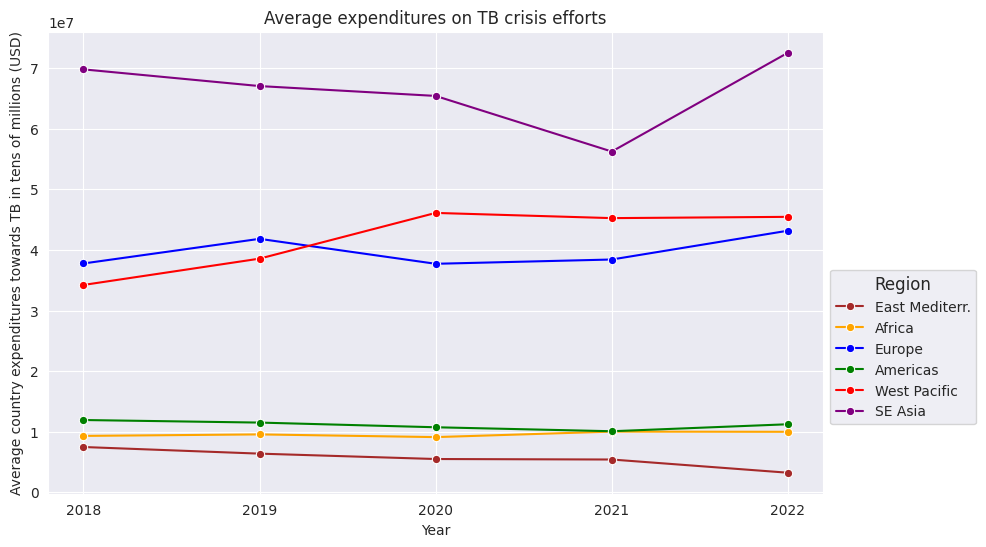

In [85]:
warnings.filterwarnings('ignore', message = '.*length-1 list-like.*')
hue_dict = {'Europe':'blue','Africa':'orange','Americas':'green','West Pacific':'red','SE Asia':'purple','East Mediterr.':'brown'}
burdexpm = burdexp[burdexp['year'] != 2017] # setting year range equal to budget x-scale

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
g = sns.lineplot(x = "year", y = "exp_tot", data = burdexpm, hue = 'g_whoregion', palette= hue_dict,
                 marker = 'o', errorbar = None)
g.set_xlabel("Year")
g.set_ylabel("Average country expenditures towards TB in tens of millions (USD)")
g.set_title("Average expenditures on TB crisis efforts")
g.legend(title='Region', fontsize=10, title_fontsize=12, bbox_to_anchor=(1, 0.5))
plt.xticks(ticks = range(2018, 2023), labels = range(2018, 2023))
plt.show()

The Southeast Asia region on average spends the most on addressing tuberculosis, with the Americas, African, and Eastern Mediterannean countries spending the least. Spending has largely held constant throughout the past five years recorded.

How does spending compare to the budget the country's report as required to carry out their plans to fight tuberculosis?


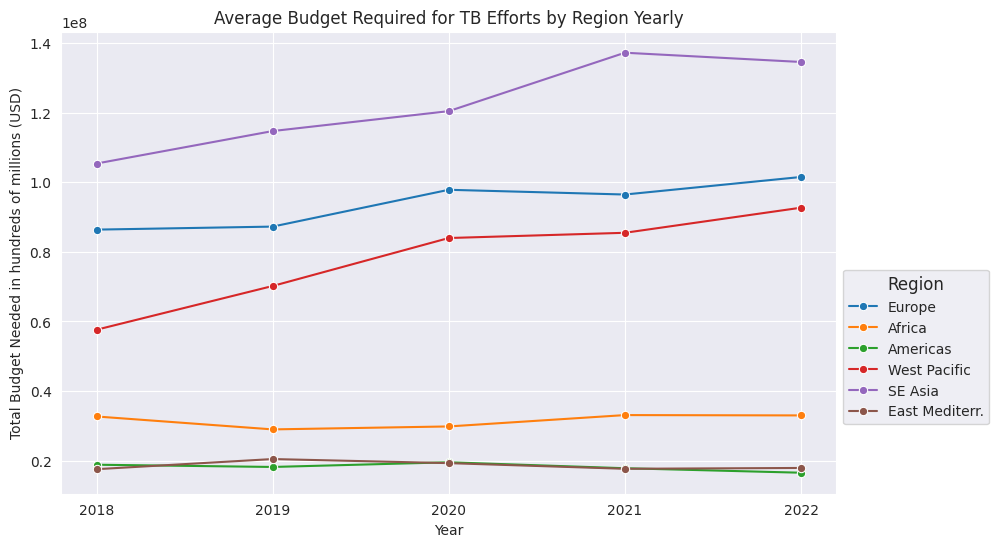

In [86]:
budgets.loc[:,"mean_budget_tot"] = budgets.groupby("country")["budget_tot"].transform(lambda x: x.mean())
budgets_filtered = budgets[budgets['year'].between(2018, 2022)]

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=budgets_filtered, x='year', y='budget_tot', hue='g_whoregion', estimator=np.mean,
             hue_order = hue_dict, errorbar=None, marker = 'o')
plt.title('Average Budget Required for TB Efforts by Region Yearly')
plt.xlabel('Year')
plt.ylabel('Total Budget Needed in hundreds of millions (USD)')
plt.xticks(ticks=range(2018, 2023), labels=range(2018, 2023))
plt.legend(title='Region', fontsize=10, title_fontsize=12, bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

Comparing these two graphs, it seems that countries on average do not spend anywhere close to their budget needs towards TB efforts. The budget graph is on a scale of hundreds of millions, while the expenditures graph is on a scale of tens of millions.

This indicates that at least among some countries there is a need for more money to successfully implement their strategy for addressing tuberculosis.


## **2c. Treatment Outcomes**

What about the treatment of these countries TB cases? We can get an idea of how effectively the money is being used by how successful treatment is.

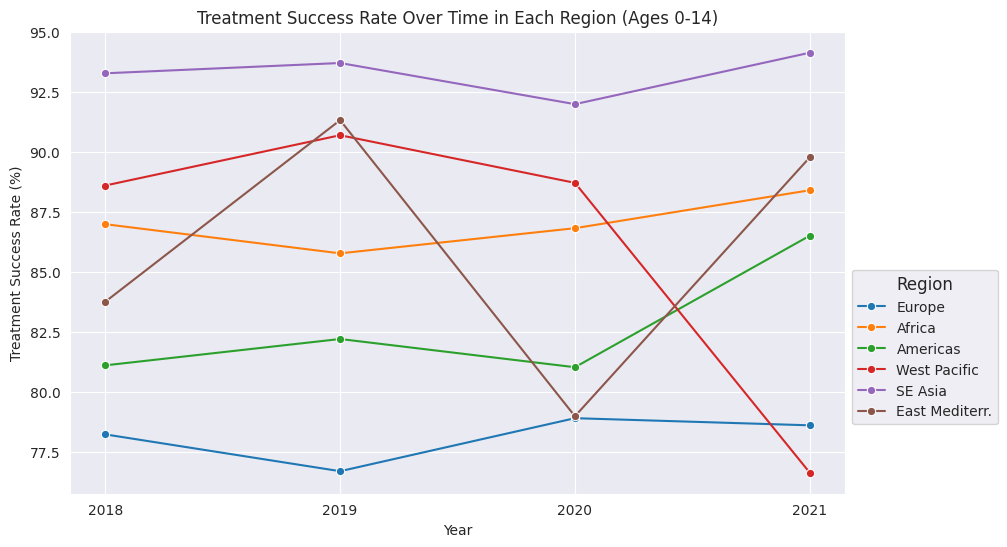

In [87]:
outcome_filtered = outcomes[(outcomes['age_group'] == '0-14') & (outcomes['year'] >= 2018)]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
tsr_rate = sns.lineplot(x = "year", y = "tsr", data = outcome_filtered, hue = 'g_whoregion',
                        hue_order = hue_dict, errorbar = None, marker = 'o')
tsr_rate.set_title(f"Treatment Success Rate Over Time in Each Region (Ages 0-14)")
tsr_rate.set_xlabel("Year")
tsr_rate.set_ylabel("Treatment Success Rate (%)")
plt.xticks([2018, 2019, 2020, 2021])
plt.legend(title='Region', fontsize=10, title_fontsize=12, bbox_to_anchor=(1, 0.5))
plt.show()

With limited data on the outcomes of all ages, the above graph focuses on average treatment success rate per region amongst the youth. Each region has a high treatment success rate, with the Western Pacific Region's 77% being the floor most recently.

Many regions faced fluctuation during the coronavirus outbreak, with the Western Pacific region's average treatment success rate plummeting over 10% in that span.

#### **TB Treatment Outcomes by Region**

In [88]:
print("Median treatment success rates as a percentage by region")
outcomes.groupby("g_whoregion")["tsr"].median().sort_values(ascending = False)

Median treatment success rates as a percentage by region


,tsr
g_whoregion,
East Mediterr.,92.0
Europe,91.0
West Pacific,91.0
SE Asia,90.0
Africa,88.0
Americas,84.0


How do treatments outcomes differ for regions? Because data is limited, we focus on the reporting of ages 0 through 14.

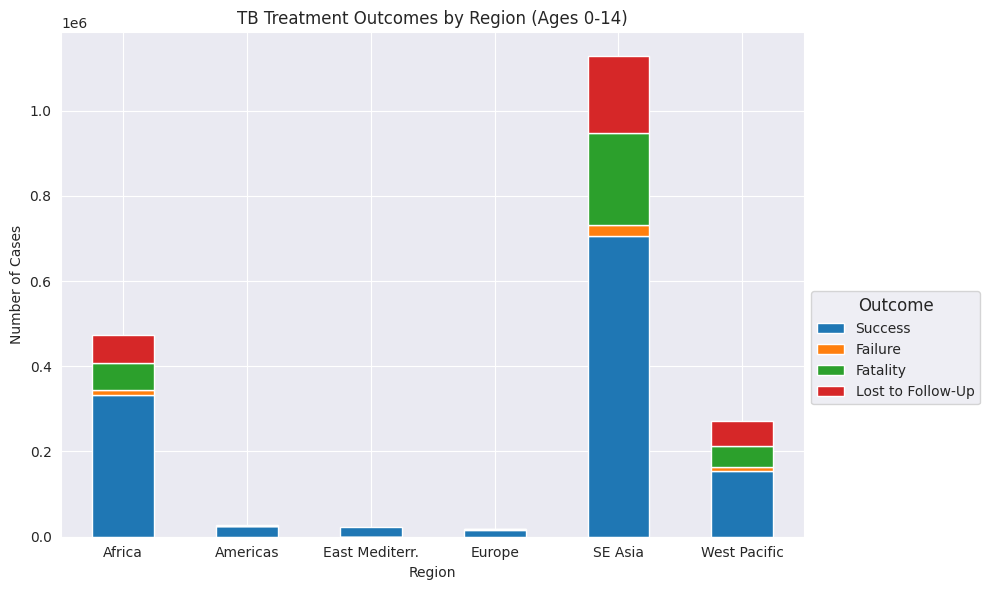

In [89]:
fill_cols = ['succ', 'fail', 'died', 'lost']
labels = {'succ': 'Success', 'fail': 'Failure', 'died': 'Fatality', 'lost': 'Lost to Follow-Up'}

tb_fill = outcomes[(outcomes['age_group'] == '0-14') & (outcomes['year'] >= 2018)].copy()
for col in fill_cols:
    tb_fill[col] = outcomes.groupby('country')[col].transform(lambda x: x.fillna(x.mean()))

tb_outcomes = tb_fill.groupby('g_whoregion')[['succ', 'fail', 'died', 'lost']].sum()

ax = tb_outcomes.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.title('TB Treatment Outcomes by Region (Ages 0-14)')

handles, current_labels = ax.get_legend_handles_labels()
custom_labels = [labels[label] for label in current_labels]

plt.legend(handles, custom_labels, title='Outcome', fontsize=10, title_fontsize=12, bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

The above graph shows TB treatment outcomes for children aged 0-14 across six regions, with Southeast Asia and Africa having the highest number of cases. SEA has the largest share of successful treatments, but also significant deaths and lost cases, while AFR also struggles with high mortality and follow-up issues. Western Pacific has moderate case numbers but notable challenges with lost and fatal outcomes. In contrast, Europe, the Americas, and Eastern Mediterranean countries have fewer cases and predominantly successful outcomes, likely due to stronger healthcare systems and better access to treatment.

# **3. Next Steps**

Through our analysis of multiple files from the WHO, we identified Africa, the Western Pacific, and Southeast Asia as the regions with the highest tuberculosis incidence rates.

Through our charts displaying expenditures and budgets needed yearly by region, we found most countries were spending much less than the budget required to effectively carry out all of the country's efforts in addressing tuberculosis.

However, our findings also showed that treatment success rates remain high across most nations.

In the next phase of our analysis, we will focus more closely on high-incidence regions, particularly Africa and Southeast Asia. We aim to examine expenditure trends in these areas to determine whether reallocating resources could strengthen prevention efforts.

We will also explore correlations between key observations like community engagement and each country's incidence and mortality rates, with the goal of providing effective recommendations to:

- Maximize the efficiency of funding,
- Strengthen prevention strategies.

## **3a. Expenditures v.s. Incidence & Mortality**

#### **Spending of Countries with the Lowest & Highest Rates of Incidence & Mortality**

We next take the analysis further to compare budget and expenditure for countries and regions based on incidence and mortality rates. Is there a specific pattern of spending amongst common countries? To get the most up-to-date picture, we look at the highest rates from the most recent 6 recorded years.

**Countries with the Highest Incidence Rates (2018-2023)**

In [90]:
burdexp.groupby(['country',"g_whoregion"])["e_inc_100k"].mean().sort_values(ascending = False)[:10]

,,e_inc_100k
country,g_whoregion,
Lesotho,Africa,640.8
Philippines,West Pacific,577.2
South Africa,Africa,567.0
Central African Republic,Africa,540.0
Gabon,Africa,517.0
Timor-Leste,SE Asia,498.0
Namibia,Africa,470.2
Papua New Guinea,West Pacific,432.0
Mongolia,West Pacific,424.8


It is interesting to note that the countries with the highest incidence rates stem from the Africa, Southeast Asia, and West Pacific Regions, highlighting those regions as ones requiring more focus.

**Countries with the Lowest Incidence Rates (2018-2023)**

In [91]:
burdexp.groupby(["country","g_whoregion"])["e_inc_100k"].mean().sort_values(ascending = True)[:10]

,,e_inc_100k
country,g_whoregion,
"occupied Palestinian territory, including east Jerusalem",East Mediterr.,0.614
Barbados,Americas,0.840
United Arab Emirates,East Mediterr.,0.868
Puerto Rico,Americas,0.892
United States of America,Americas,2.680
Israel,Europe,2.880
Grenada,Americas,2.900
Saint Lucia,Americas,3.220
Jamaica,Americas,3.240


**Countries with the Highest Mortality Rates (2018-2023)**

In [92]:
burdexp.groupby(["country","g_whoregion"])["e_mort_100k"].mean().sort_values(ascending = False)[:10]

,,e_mort_100k
country,g_whoregion,
Lesotho,Africa,213.4
Central African Republic,Africa,165.0
Gabon,Africa,139.4
Guinea-Bissau,Africa,133.8
Namibia,Africa,106.4
Congo,Africa,96.4
South Africa,Africa,96.2
Timor-Leste,SE Asia,95.6
Equatorial Guinea,Africa,92.0


The countries with the highest mortality rates stem from Africa and Southeast Asia, with 9 of these 10 countries being from Africa. This may indicate that Africa has less success treating cases than the other two regions, and if so, they need more assistance on that front.

**Countries with the Lowest Mortality Rates (2018-2023)**

In [93]:
burdexp.groupby(["country","g_whoregion"])["e_mort_100k"].mean().sort_values(ascending = True)[:10]

,,e_mort_100k
country,g_whoregion,
"occupied Palestinian territory, including east Jerusalem",East Mediterr.,0.066
Jordan,East Mediterr.,0.092
Syrian Arab Republic,East Mediterr.,0.140
Puerto Rico,Americas,0.180
United States of America,Americas,0.190
Denmark,Europe,0.192
Netherlands (Kingdom of the),Europe,0.200
Montenegro,Europe,0.210
Sweden,Europe,0.240


We will now create a DataFrame containing burden information for only the countries with the lowest/highest incidence/mortality rate (10 each), and merge it with the budgets dataframe to get comprehensive burden/budget information for these countries.

In [94]:
top_10_inc = burdexp.groupby(['country',"g_whoregion"])["e_inc_100k"].mean().sort_values(ascending = False)[:10]
t10inc_country_list = top_10_inc.index.get_level_values('country').tolist()
bottom_10_inc = burdexp.groupby(["country","g_whoregion"])["e_inc_100k"].mean().sort_values(ascending = True)[:10]
b10inc_country_list = bottom_10_inc.index.get_level_values('country').tolist()
top_10_mort = burdexp.groupby(["country","g_whoregion"])["e_mort_100k"].mean().sort_values(ascending = False)[:10]
t10mort_country_list = top_10_mort.index.get_level_values('country').tolist()
bottom_10_mort = burdexp.groupby(["country","g_whoregion"])["e_mort_100k"].mean().sort_values(ascending = True)[:10]
b10mort_country_list = bottom_10_mort.index.get_level_values('country').tolist()

In [95]:
inc_mort_countries = list(set(t10inc_country_list + b10inc_country_list + t10mort_country_list + b10mort_country_list))
burdexp_inc_mort = burdexp[burdexp['country'].isin(inc_mort_countries)].copy()
burdexp_inc_mort.drop(columns = ['e_mort_num', 'cfr', 'cfr_pct',
       'c_newinc_100k', 'c_cdr', 'exp_cpp_dstb', 'exp_cpp_mdr', 'exp_cpp_tpt',
       'exp_lab', 'rcvd_lab', 'exp_fld', 'rcvd_fld', 'exp_prog', 'rcvd_prog',
       'exp_sld', 'rcvd_sld', 'exp_mdrmgt', 'rcvd_mdrmgt', 'exp_tpt',
       'rcvd_tpt', 'exp_patsup', 'rcvd_patsup', 'exp_orsrvy', 'rcvd_orsrvy', 'rcvd_tot', 'rcvd_tot_domestic',
       'rcvd_tot_gf', 'rcvd_tot_usaid', 'rcvd_tot_grnt', 'hcfvisit_dstb',
       'hospd_dstb_prct', 'hospd_dstb_dur'], inplace = True)
budgets10 = budgets[budgets['country'].isin(inc_mort_countries)].copy()
budgets10.drop(columns=['tx_dstb', 'budget_cpp_dstb', 'tx_mdr', 'budget_cpp_mdr', 'tx_xdr',
       'budget_cpp_xdr', 'tx_tpt', 'budget_cpp_tpt', 'budget_lab', 'cf_lab',
       'budget_staff', 'cf_staff', 'budget_fld', 'cf_fld', 'budget_prog',
       'cf_prog', 'budget_sld', 'cf_sld', 'budget_mdrmgt', 'cf_mdrmgt',
       'budget_tpt', 'cf_tpt', 'budget_tbhiv', 'cf_tbhiv', 'budget_patsup',
       'cf_patsup', 'budget_orsrvy', 'cf_orsrvy', 'budget_oth', 'cf_oth','cf_tot', 'cf_tot_domestic', 'cf_tot_gf', 'cf_tot_usaid',
       'cf_tot_grnt', 'cf_tot_sources'], inplace=True)
budgets10_filtered = budgets10[budgets10['year'].between(2018, 2022)].copy()
burdexp_inc_mort_filtered = burdexp_inc_mort[burdexp_inc_mort['year'].between(2018, 2022)].copy()
budgets10_filtered.reset_index()
burdexp_inc_mort_filtered.reset_index()

# merging
burdexpbudg_inc_mort2 = pd.merge(burdexp_inc_mort_filtered, budgets10_filtered[['country','budget_tot', 'mean_budget_tot']], on='country')
burdexpbudg_inc_mort2 = burdexpbudg_inc_mort2.fillna(0)
burdexpbudg_inc_mort2.drop(columns=['cf_tot',	'cf_tot_usaid',	'budget_tot_y'], inplace=True)
burdexpbudg_inc_mort2.rename(columns={'budget_tot_x':'budget_tot'}, inplace=True)

averages = burdexpbudg_inc_mort2.groupby(['country','iso3'], as_index=False).agg({'e_inc_100k':'mean', 'e_mort_100k':'mean','budget_tot':'mean','exp_tot': 'mean'})

top_10_incidence_countries = averages.nlargest(10, 'e_inc_100k')['iso3']
bottom_10_incidence_countries = averages.nsmallest(10, 'e_inc_100k')['iso3']
top_10_mortality_countries = averages.nlargest(10, 'e_mort_100k')['iso3']
bottom_10_mortality_countries = averages.nsmallest(10, 'e_mort_100k')['iso3']

top_incidence_avg = averages[averages['iso3'].isin(top_10_incidence_countries)]
bottom_incidence_avg = averages[averages['iso3'].isin(bottom_10_incidence_countries)]
top_mortality_avg = averages[averages['iso3'].isin(top_10_mortality_countries)]
bottom_mortality_avg = averages[averages['iso3'].isin(bottom_10_mortality_countries)]

top_incidence_melted = pd.melt(top_incidence_avg, id_vars=['iso3', 'country'], value_vars=['budget_tot', 'exp_tot'], var_name='Type', value_name='Amount')
bottom_incidence_melted = pd.melt(bottom_incidence_avg, id_vars=['iso3', 'country'], value_vars=['budget_tot', 'exp_tot'], var_name='Type', value_name='Amount')
top_mortality_melted = pd.melt(top_mortality_avg, id_vars=['iso3', 'country'], value_vars=['budget_tot', 'exp_tot'], var_name='Type', value_name='Amount')
bottom_mortality_melted = pd.melt(bottom_mortality_avg, id_vars=['iso3', 'country'], value_vars=['budget_tot', 'exp_tot'], var_name='Type', value_name='Amount')

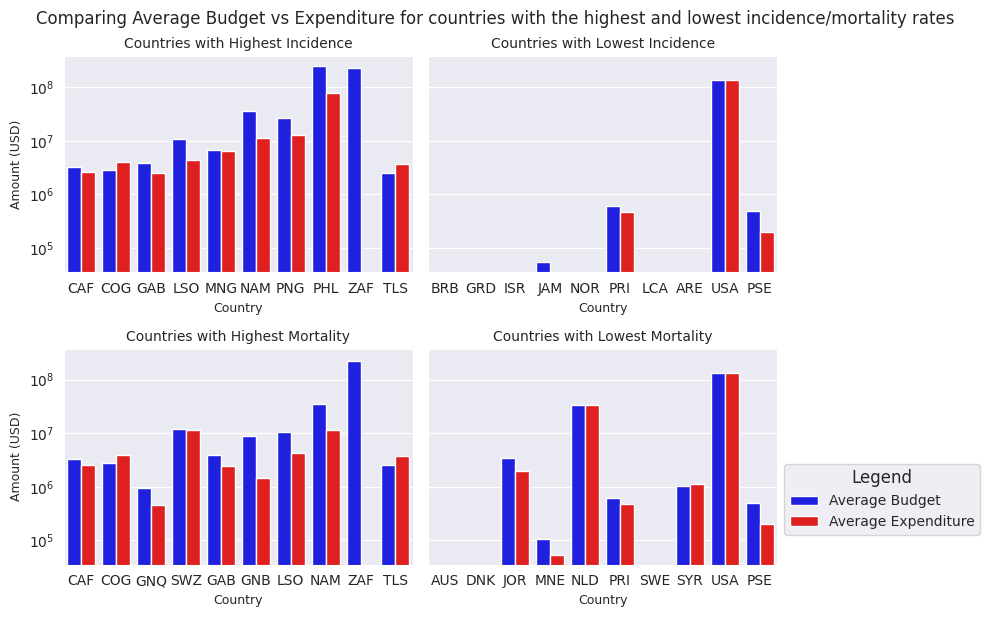

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
plt.yscale('log')

labels = {'budget_tot': 'Average Budget', 'exp_tot': 'Average Expenditure'}
hue_order = ['budget_tot', 'exp_tot']

# top 10 incidence
sns.barplot(data=top_incidence_melted, x='iso3', y='Amount', hue='Type', hue_order=hue_order, ax=axes[0,0], palette=['b', 'r'], legend=False)
axes[0, 0].set_title('Countries with Highest Incidence', fontsize=10)
axes[0, 0].set_xlabel('Country', fontsize=9)
axes[0, 0].set_ylabel('Amount (USD)', fontsize=9)

# bottom 10 incidence
sns.barplot(data=bottom_incidence_melted, x='iso3', y='Amount', hue='Type', hue_order=hue_order, ax=axes[0,1], palette=['b', 'r'], legend=False)
axes[0, 1].set_title('Countries with Lowest Incidence', fontsize=10)
axes[0, 1].set_xlabel('Country', fontsize=9)
axes[0, 1].set_ylabel('Amount (USD)', fontsize=9)

# top 10 mortality
sns.barplot(data=top_mortality_melted, x='iso3', y='Amount', hue='Type', hue_order=hue_order, ax=axes[1,0], palette=['b', 'r'], legend=False)
axes[1, 0].set_title('Countries with Highest Mortality', fontsize=10)
axes[1, 0].set_xlabel('Country', fontsize=9)
axes[1, 0].set_ylabel('Amount (USD)', fontsize=9)

# bottom 10 mortality
sns.barplot(data=bottom_mortality_melted, x='iso3', y='Amount', hue='Type', hue_order=hue_order, ax=axes[1,1], palette=['b', 'r'])
axes[1, 1].set_title('Countries with Lowest Mortality', fontsize=10)
axes[1, 1].set_xlabel('Country', fontsize=9)
axes[1, 1].set_ylabel('Amount (USD)', fontsize=9)

handles, _ = axes[1, 1].get_legend_handles_labels()
axes[1, 1].legend(handles=handles, labels=[labels[h] for h in hue_order], title='Legend', fontsize=10, title_fontsize=12, bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.suptitle('Comparing Average Budget vs Expenditure for countries with the highest and lowest incidence/mortality rates', y=1.02)
plt.show()


When comparing countries with high and low TB rates on their budget vs. expenditure, we notice that for countries with low TB rates, the ratio between budget and expenditure is closer to 1, while for those with high TB rates, that ratio favors budget. Is there a reason why most countries with high TB rates spend relatively less, as compared to their budgets? Interestingly, we can see that DR Congo spends more than their budet, but still suffers from high TB rates. What if we expanded on this comparison, but aggregated by Region instead of the countries with lowest and highest TB incidence/mortality rates?

In [97]:
from IPython.display import Pretty as disp
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
# top 3 inc
top = burdexp.groupby(["g_whoregion"])["e_inc_100k"].mean().sort_values(ascending = False)[:3]
# bottom 3 inc
bottom = burdexp.groupby(["g_whoregion"])["e_inc_100k"].mean().sort_values(ascending = True)[:3]
# the lowest/highest indicence regions are the same regarding mortality as well, which is why we only used incidence values to assign said regions to either "top" or "bottom"
top_region_list = top.index.get_level_values('g_whoregion').tolist()
bottom_region_list = bottom.index.get_level_values('g_whoregion').tolist()
# print(top_region_list, bottom_region_list)
inc_mort_regions = list(set(top_region_list + bottom_region_list))
burdexp_inc_mort_reg = burdexp[burdexp['g_whoregion'].isin(inc_mort_regions)].copy()
burdexp_inc_mort_reg.drop(columns = ['e_mort_num', 'cfr', 'cfr_pct',
       'c_newinc_100k', 'c_cdr', 'exp_cpp_dstb', 'exp_cpp_mdr', 'exp_cpp_tpt',
       'exp_lab', 'rcvd_lab', 'exp_fld', 'rcvd_fld', 'exp_prog', 'rcvd_prog',
       'exp_sld', 'rcvd_sld', 'exp_mdrmgt', 'rcvd_mdrmgt', 'exp_tpt',
       'rcvd_tpt', 'exp_patsup', 'rcvd_patsup', 'exp_orsrvy', 'rcvd_orsrvy', 'rcvd_tot', 'rcvd_tot_domestic',
       'rcvd_tot_gf', 'rcvd_tot_usaid', 'rcvd_tot_grnt', 'hcfvisit_dstb',
       'hospd_dstb_prct', 'hospd_dstb_dur'], inplace = True)
budgets10_reg = budgets[budgets['g_whoregion'].isin(inc_mort_regions)].copy()
budgets10_reg.drop(columns=['tx_dstb', 'budget_cpp_dstb', 'tx_mdr', 'budget_cpp_mdr', 'tx_xdr',
       'budget_cpp_xdr', 'tx_tpt', 'budget_cpp_tpt', 'budget_lab', 'cf_lab',
       'budget_staff', 'cf_staff', 'budget_fld', 'cf_fld', 'budget_prog',
       'cf_prog', 'budget_sld', 'cf_sld', 'budget_mdrmgt', 'cf_mdrmgt',
       'budget_tpt', 'cf_tpt', 'budget_tbhiv', 'cf_tbhiv', 'budget_patsup',
       'cf_patsup', 'budget_orsrvy', 'cf_orsrvy', 'budget_oth', 'cf_oth','cf_tot', 'cf_tot_domestic', 'cf_tot_gf', 'cf_tot_usaid',
       'cf_tot_grnt', 'cf_tot_sources'], inplace=True)
budgets10_reg_filtered = budgets10_reg[budgets10_reg['year'].between(2018, 2022)].copy()
burdexp_inc_mort_reg_filtered = burdexp_inc_mort_reg[burdexp_inc_mort_reg['year'].between(2018, 2022)].copy()
budgets10_reg_filtered.reset_index()
burdexp_inc_mort_reg_filtered.reset_index()

# merging
burdexpbudg_inc_mort2_reg = pd.merge(burdexp_inc_mort_reg_filtered, budgets10_reg_filtered[['g_whoregion','budget_tot', 'mean_budget_tot']], on='g_whoregion')
burdexpbudg_inc_mort2_reg = burdexpbudg_inc_mort2_reg.fillna(0)
burdexpbudg_inc_mort2_reg.drop(columns=['cf_tot',	'cf_tot_usaid',	'budget_tot_y'], inplace=True)
burdexpbudg_inc_mort2_reg.rename(columns={'budget_tot_x':'budget_tot'}, inplace=True)
burdexpbudg_inc_mort2_reg

###

averages_reg = burdexpbudg_inc_mort2_reg.groupby(['g_whoregion'], as_index=False).agg({'e_inc_100k':'mean', 'e_mort_100k':'mean','budget_tot':'mean','exp_tot': 'mean'})
top_3_incidence_reg = averages_reg.nlargest(3, 'e_inc_100k')['g_whoregion']
bottom_3_incidence_reg = averages_reg.nsmallest(3, 'e_inc_100k')['g_whoregion']
top_3_mortality_reg= averages_reg.nlargest(3, 'e_mort_100k')['g_whoregion']
bottom_3_mortality_reg = averages_reg.nsmallest(3, 'e_mort_100k')['g_whoregion']

top_incidence_avg_reg = averages_reg[averages_reg['g_whoregion'].isin(top_3_incidence_reg)]
bottom_incidence_avg_reg = averages_reg[averages_reg['g_whoregion'].isin(bottom_3_incidence_reg)]
top_mortality_avg_reg = averages_reg[averages_reg['g_whoregion'].isin(top_3_mortality_reg)]
bottom_mortality_avg_reg= averages_reg[averages_reg['g_whoregion'].isin(bottom_3_mortality_reg)]

highest_incidence_reg_melted = pd.melt(top_incidence_avg_reg, id_vars=['g_whoregion'], value_vars=['budget_tot', 'exp_tot'], var_name='Type', value_name='Amount')
least_incidence_reg_melted = pd.melt(bottom_incidence_avg_reg, id_vars=['g_whoregion'], value_vars=['budget_tot', 'exp_tot'], var_name='Type', value_name='Amount')
highest_mortality_reg_melted = pd.melt(top_mortality_avg_reg, id_vars=['g_whoregion'], value_vars=['budget_tot', 'exp_tot'], var_name='Type', value_name='Amount')
least_mortality_reg_melted = pd.melt(bottom_mortality_avg_reg, id_vars=['g_whoregion'], value_vars=['budget_tot', 'exp_tot'], var_name='Type', value_name='Amount')
display('highest_incidence_reg_melted', 'least_mortality_reg_melted', 'highest_mortality_reg_melted', 'least_incidence_reg_melted')


,g_whoregion,Type,Amount
0,Africa,budget_tot,2.844998e+07
1,SE Asia,budget_tot,1.224715e+08
2,West Pacific,budget_tot,5.920655e+07
3,Africa,exp_tot,9.599145e+06
4,SE Asia,exp_tot,6.620198e+07
5,West Pacific,exp_tot,4.191720e+07
,g_whoregion,Type,Amount
0,Americas,budget_tot,1.321237e+07
1,East Mediterr.,budget_tot,1.281380e+07
2,Europe,budget_tot,3.964793e+07


In the above tables, each regions' rank in TB incidence and mortality are the same.

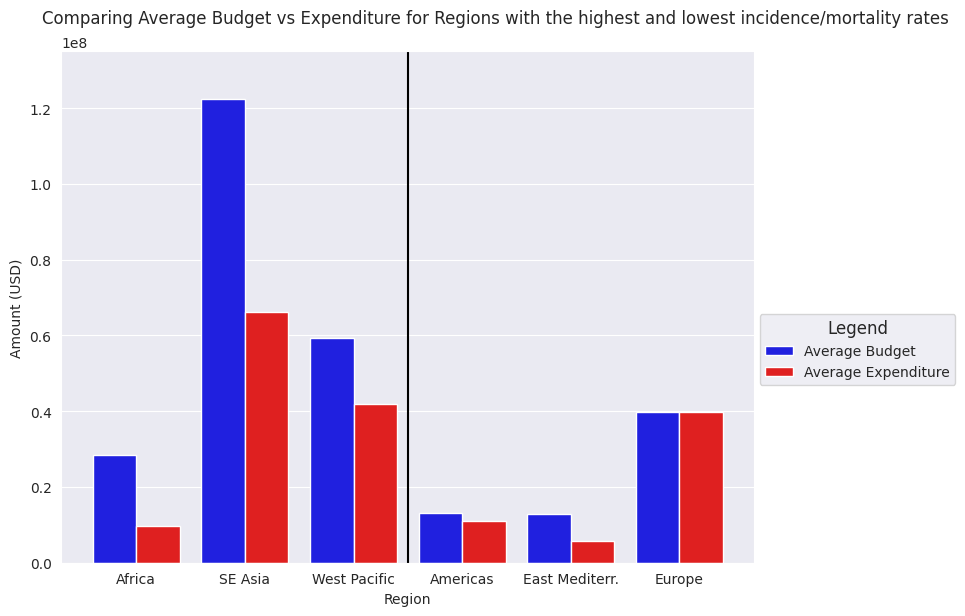

In [98]:
extremes_inc = pd.concat([highest_incidence_reg_melted, least_incidence_reg_melted])

plt.figure(figsize=(10, 6))

labels = {'budget_tot': 'Average Budget', 'exp_tot': 'Average Expenditure'}
hue_order = ['budget_tot', 'exp_tot']

ax = sns.barplot(data=extremes_inc, x='g_whoregion', y='Amount', hue ='Type', palette=['b', 'r'])
plt.xlabel("Region")
plt.ylabel("Amount (USD)")
plt.vlines(x=2.5, ymin=0, ymax=135000000, colors='black', linestyles='-')
plt.ylim(0, 135000000)

ax.legend(handles=handles, labels=[labels[h] for h in hue_order], title='Legend', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.3, 0.5))

plt.tight_layout()

plt.suptitle('Comparing Average Budget vs Expenditure for Regions with the highest and lowest incidence/mortality rates', y=1.02)
plt.show()

This visualization shows a clear difference in how regions that suffer from high TB-rates differ in spending from those with low rates. The regions with lower TB rates spend relatively close to their estimated budget, bar the Eastern Mediterranean region. In contrast, the regions with higher TB rates spend a lot less than their estimated budget. In fact, when looking at the Africa region, their needed budget is almost twice as large as the Americas', but the two regions' spending is roughly equal. This may indicate disparities in fund allocation to certain countries in Africa, which is a problem that should be addressed. This need is especially present considering our finding that 9 of the 10 countries with the highest mortality rates are African countries. This would indicate that countries in this region are in desperate need of treatment resources.

<Figure size 1000x600 with 0 Axes>

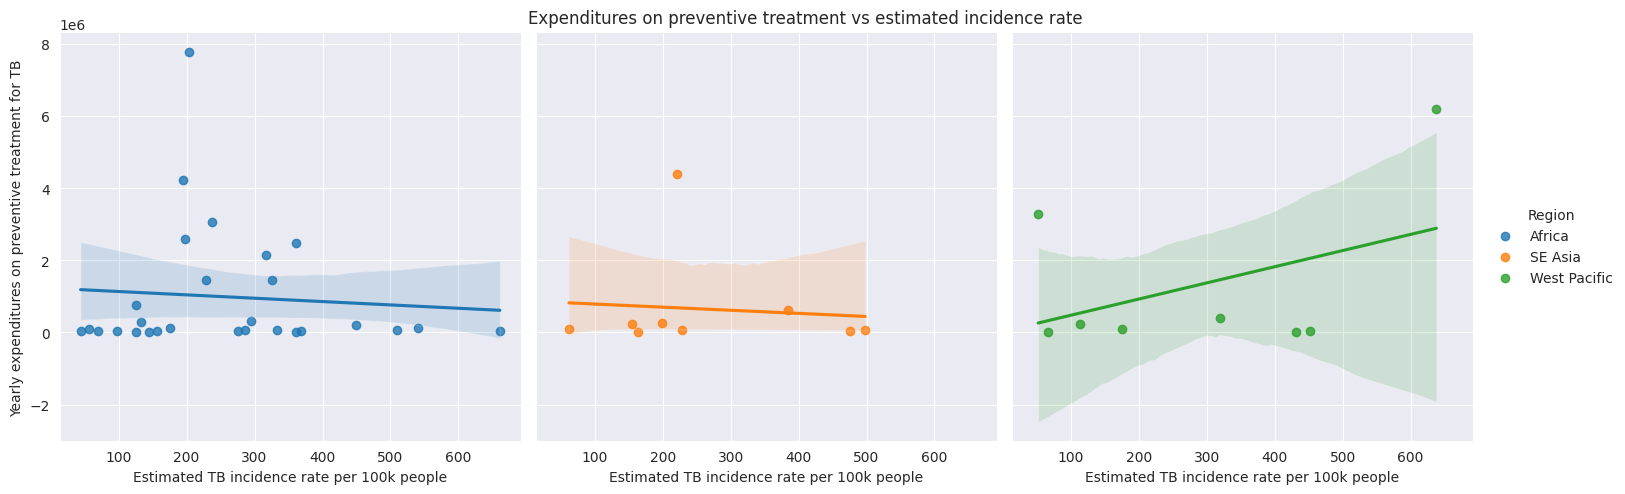

In [99]:
affected_regions = ["Africa","West Pacific","SE Asia"]
burdexp2022 = burdexp[burdexp['year'] == 2022]

plt.figure(figsize=(10, 6))

# use lmplot instead of relplot to include regression lines
g = sns.lmplot(data=burdexp2022[(burdexp2022["g_whoregion"].isin(affected_regions)) & (burdexp2022['exp_tpt'] > 10000)],
               x="e_inc_100k", y="exp_tpt", col="g_whoregion", hue="g_whoregion")
g.set_titles("")
g.fig.suptitle("Expenditures on preventive treatment vs estimated incidence rate")
g.add_legend(title = "Region")

# set axis labels
g.set_axis_labels("Estimated TB incidence rate per 100k people", "Yearly expenditures on preventive treatment for TB")

plt.show()

The above visualization shows a slight negative correlation between yearly expenditure on preventative treatments for TB, and TB incidence rate per 100k people, for African and South East Asian countries, which matches our intuition. However, this correlation is slightly positive for Western Pacific countries, which may be influenced by an outlier.


### **Global Trends of Burden, Expenditures and their Impact on Mortality Rate**

Next, we visualize the relation of expenditure and mortality rate for all countries to get a deeper understanding of their connection.

In [100]:
region_colors = {
    'Africa': 'rgba(144, 238, 144, 0.8)',
    'Americas': 'rgba(135, 206, 250, 0.8)',
    'Europe': 'rgba(221, 160, 221, 0.8)',
    'East Mediterr.': 'rgba(255, 160, 122, 0.8)',
    'SE Asia': 'rgba(205, 133, 63, 0.8)',
    'West Pacific': 'rgba(255, 228, 181, 0.8)'
}

expenditure_colors = {
    'Low': 'rgba(192, 192, 192, 0.8)',
    'Medium': 'rgba(255, 218, 185, 0.8)',
    'High': 'rgba(240, 230, 140, 0.8)',
    'Very High': 'rgba(255, 182, 193, 0.8)'
}

mortality_colors = {
    'Low Mortality': 'rgba(190, 190, 225, 0.8)',
    'Medium Mortality': 'rgba(255, 228, 196, 0.8)',
    'High Mortality': 'rgba(255, 160, 122, 0.8)',
    'Very High Mortality': 'rgba(176, 224, 230, 0.8)'
}

burdexp_latest = burdexp[burdexp['year'] == 2020].copy()

expenditure_labels = ['Low Expenditure', 'Medium Expenditure', 'High Expenditure', 'Very High Expenditure']
mortality_labels = ['Low Mortality', 'Medium Mortality', 'High Mortality', 'Very High Mortality']

burdexp_latest['expenditure_bins'] = pd.cut(burdexp_latest['exp_tot'], bins=4, labels=expenditure_labels, ordered=True)
burdexp_latest['mortality_bins'] = pd.cut(burdexp_latest['e_mort_100k'], bins=4, labels=mortality_labels, ordered=True)

regions = burdexp_latest['g_whoregion'].unique()
expenditure_levels = pd.Categorical(expenditure_labels, ordered=True)
mortality_levels = pd.Categorical(mortality_labels, ordered=True)

all_nodes = list(regions) + list(expenditure_levels.categories) + list(mortality_levels.categories)
node_map = {node: i for i, node in enumerate(all_nodes)}

sources = []
targets = []
values = []
link_colors = []

for region in regions:
    for exp_level in expenditure_levels.categories:
        count = len(burdexp_latest[(burdexp_latest['g_whoregion'] == region) & (burdexp_latest['expenditure_bins'] == exp_level)])
        if count > 0:
            sources.append(node_map[region])
            targets.append(node_map[exp_level])
            values.append(count)
            link_colors.append(region_colors[region])

for exp_level in expenditure_levels.categories:
    for mort_level in mortality_levels.categories:
        count = len(burdexp_latest[(burdexp_latest['expenditure_bins'] == exp_level) & (burdexp_latest['mortality_bins'] == mort_level)])
        if count > 0:
            sources.append(node_map[exp_level])
            targets.append(node_map[mort_level])
            values.append(count)
            link_colors.append(mortality_colors[mort_level])

node_colors = [region_colors.get(node, 'rgba(192, 192, 192, 0.8)') for node in regions] + \
              [expenditure_colors.get(node, 'rgba(192, 192, 192, 0.8)') for node in expenditure_levels.categories] + \
              [mortality_colors.get(node, 'rgba(192, 192, 192, 0.8)') for node in mortality_levels.categories]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=30,
        thickness=20,
        line=dict(color="black", width=1.0),
        label=all_nodes,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
))

fig.update_layout(
    height=615, width=985,
    title_text="Flow Between Burden, Expenditure, and Mortality Rate (2020)",
    font=dict(size=14),
    title_font=dict(size=18, color='black'),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

This visualization (Sankey diagram) shows the flow between different regions and how their expenditures for TB efforts relate to mortality outcomes. Specifically, Africa, which faces the second highest TB burden (as shown by the thickness of the flow), channels most of its resources into low expenditure categories, correlating with low mortality rates, suggesting some effectiveness of current spending.

A deeper insight from the chart shows that while some regions spend relatively less, they still manage to achieve lower mortality rates. On the other hand, regions like Eastern Mediterranean and Europe, which allocate more resources (medium to very high expenditure), still have diverse outcomes in terms of mortality. This could indicate inefficiencies in how funds are being utilized or highlight potential challenges in healthcare infrastructure.

## **3b. Ministry Involvement**

Here, we look into the involvement of ministries in national TB response, in order to try and understand how each region can benefit from the same. The data under review is that of 2023, and the
Ministries included are Agriculture, Defence, Social Development, Education, Finance, Justice, Labour, and Transport.

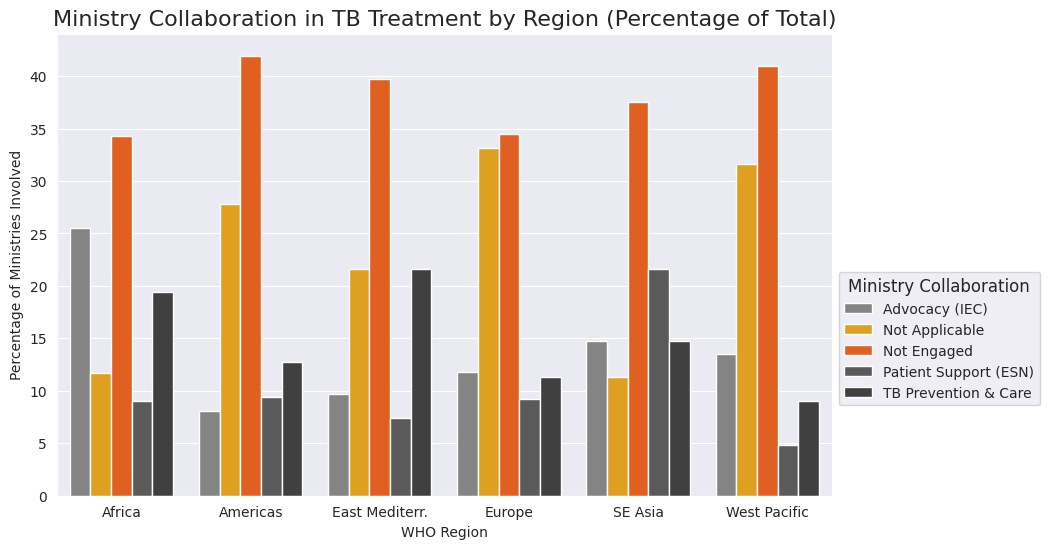

In [101]:
collab_mapping = {2: 'Not Applicable', 6: 'Not Engaged', 230: 'Advocacy (IEC)', 231: 'TB Prevention & Care', 232: 'Patient Support (ESN)'}
unhlm_commitments['ministry_collab_label'] = unhlm_commitments['ministry_collab'].map(collab_mapping)
unhlm_commitments_grouped = unhlm_commitments.groupby(['g_whoregion', 'ministry_collab_label']).size().reset_index(name='counts')

unhlm_commitments_total = unhlm_commitments.groupby('g_whoregion').size().reset_index(name='total_count')

unhlm_commitments_merged = pd.merge(unhlm_commitments_grouped, unhlm_commitments_total, on='g_whoregion')

unhlm_commitments_merged['percentage'] = (unhlm_commitments_merged['counts'] / unhlm_commitments_merged['total_count']) * 100
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
palettes = {'Not Applicable':'#FFAA00', 'Not Engaged':'#FF5500', 'Advocacy (IEC)':'#848484', 'Patient Support (ESN)':'#5A5A5A', 'TB Prevention & Care':'#404040'}
ax = sns.barplot(x='g_whoregion', y='percentage', hue='ministry_collab_label', data=unhlm_commitments_merged, palette=palettes)
plt.title('Ministry Collaboration in TB Treatment by Region (Percentage of Total)', fontsize=16)
plt.xlabel('WHO Region')
plt.ylabel('Percentage of Ministries Involved')
ax.legend(title='Ministry Collaboration', fontsize=10, title_fontsize=12, bbox_to_anchor=(1, 0.5))
plt.show()

The above graph highlights that a large percentage of ministries across regions are not actively involved in the national TB response. Additionally, a significant portion of ministries are classified as "not applicable" to the TB response efforts. This lack of engagement represents a missed opportunity. We believe that greater involvement of ministries is crucial in improving outcomes, especially with their participation complementing ongoing community engagement initiatives.

Governments, with their broader resources and direct influence on policy-making, are positioned to drive more effective and coordinated TB response efforts. They can help optimize resource allocation and ensure the integration and implementation of national strategies, enhancing the overall impact of interventions. A higher level of engagement from ministries could lead to accelerating progress in the fight against TB.

## **3c. Community Engagement & Basic Engagement Units**

### **Average Basic Engagement units over time by region**

Knowing that simply increasing spending has little effect on TB outcomes, and government involvement leaves much to be desired, we investigate the impact of community engagement.

Community engagement is defined by the WHO as "a process of developing relationships that enable stakeholders to work together to address health-related issues and promote well-being to achieve positive health impact and outcomes". In the next block of code, we take a closer look at community engagement by region.

Basic Management Units (BMUs) according to the WHO is defined by a manager who oversees all TB control activities within a subset of the national population, and maintains a master registry of all TB cases being treated and reported within that subset.

The following visualization gives an idea of the average number of BMUs per country for each region.

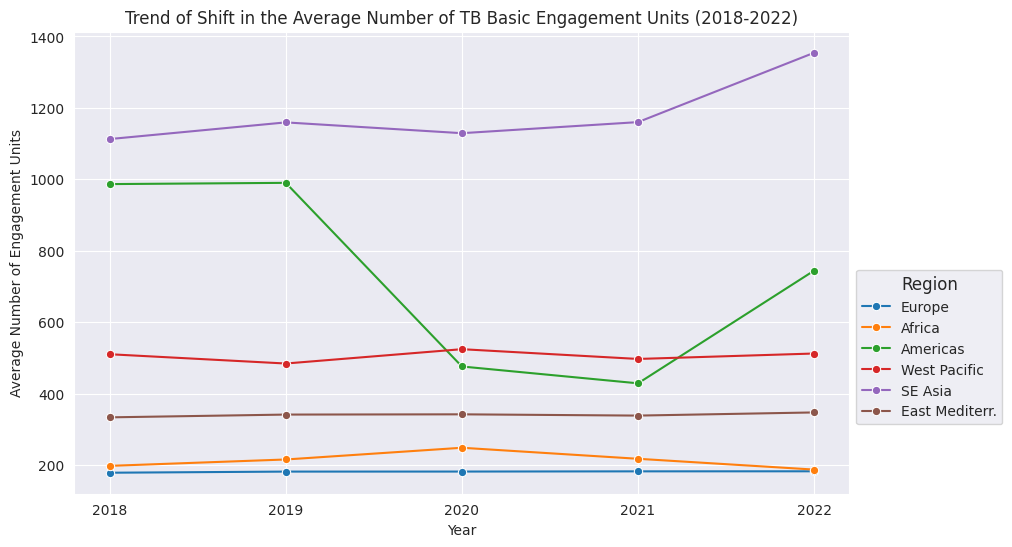

In [102]:
# filtering and acquiring mean values per region
burdcommu_filtered = burdcommu[burdcommu['year']>=2018]

bmu_mean = burdcommu_filtered.groupby(['g_whoregion','year'])['bmu'].mean()
bmu_mean = bmu_mean.reset_index()

# create the plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot( data=bmu_mean, x='year', y='bmu', hue='g_whoregion', hue_order = hue_dict, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Average Number of Engagement Units')
ax.set_title('Trend of Shift in the Average Number of TB Basic Engagement Units (2018-2022)')
ax.set_xticks(range(2018, 2023))
ax.legend(title='Region', fontsize=10, title_fontsize=12, bbox_to_anchor=(1, 0.5))

ax.grid(visible=True)
plt.show()

Once again, Southeast Asian countries on average have the highest number of basic engagement units annually, with countries in the Americas a distant second. This makes sense and is line with Southeast Asian countries spending the more than other regions.

Despite having the highest incidence rates for tuberculosis, African nations have the lowest number of basic engagement units.

### **Pre-COVID and post-COVID basic engagement units for highest and lowest incidence and mortality rate countries**

Next, we import data for countries with the highest incidence rates and those with the highest mortality rates for further study.

In [103]:
# use same logic to select (in the previous code) top_10_mort countries
top_10_mort = burdcommu.groupby(["country"])["e_mort_100k"].mean().sort_values(ascending=False)[:10]
top_10_mort_country = top_10_mort.index.tolist()

top_10_inc = burdcommu.groupby(["country"])["e_inc_100k"].mean().sort_values(ascending=False)[:10]
top_10_inc_country = top_10_inc.index.tolist()

Plotting the shift in basic engagement unit amounts for the countries with the highest mortality rates between 2018 and 2022. The plot shows that most of these countries, heavily affected by TB, have seen an increase in basic engagement unit amounts over the past five years.

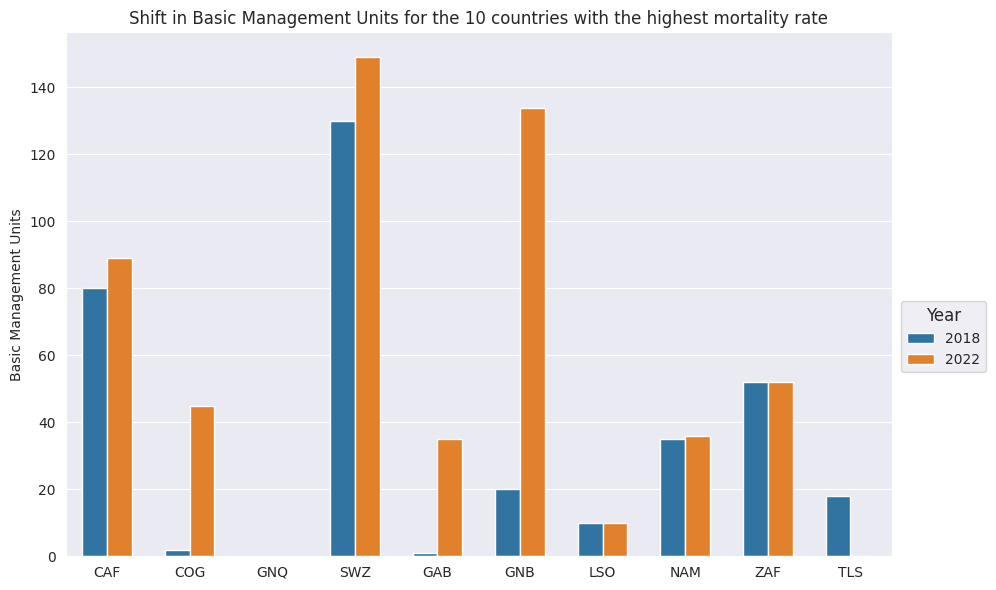

In [104]:
warnings.filterwarnings('ignore', category = UserWarning, message = 'matplotlib.legend')
# plotting the shift in community engagement unit amounts for the top 10 countries by mortality rate between 2018 and 2022
burdcommu_top_10_mort = burdcommu[
    (burdcommu['country'].isin(top_10_mort_country)) &
    (burdcommu['year'].isin([2018, 2022]))
]

burdcommu_top_10_mort = burdcommu_top_10_mort.astype({'year':str})

plt.figure(figsize=(10, 6))
plt.title('Shift in Basic Management Units for the 10 countries with the highest mortality rate')
sns.barplot(data=burdcommu_top_10_mort, x='iso3', y='bmu', hue='year', width=0.6)
plt.xlabel('')
plt.ylabel('Basic Management Units')
plt.xticks(rotation=0)
# plt.yticks(fontsize=24)
plt.legend(title='Year', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.123, 0.5))


plt.tight_layout()
plt.show()

Plotting the shift in basic engagement unit amounts for the countries with highest incidence rates between 2018 and 2022. The plot shows that most of these countries, heavily affected by TB, have seen an increase in basic engagement unit amounts over the past five years.
(Because the numbers in the Philippines are outstandingly higher than in other countries, in order not to make the numbers for other countries difficult to read, we used the subplot function to separately depict the numbers for the Philippines.)

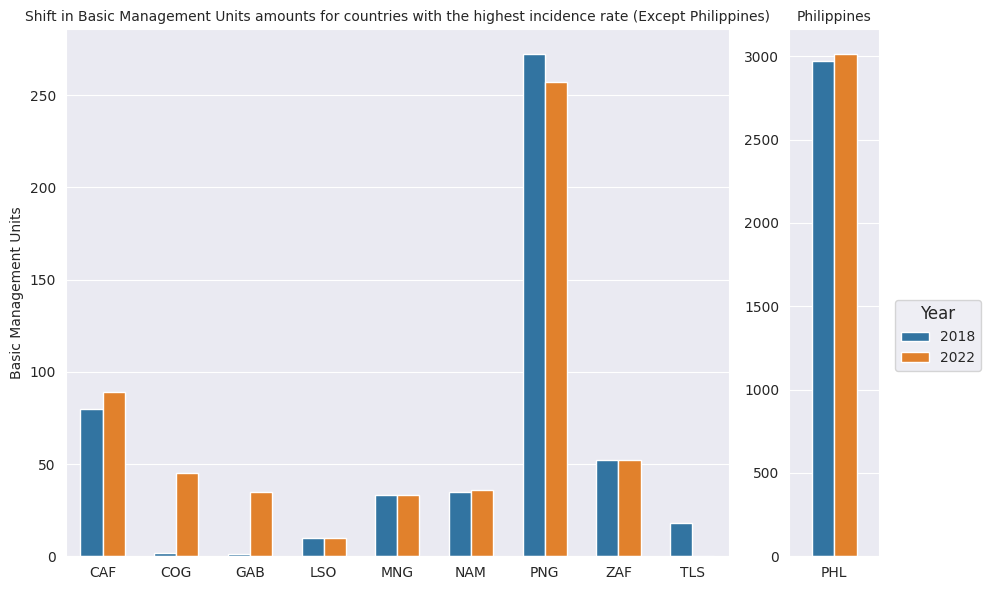

In [105]:
burdcommu_top_10_inc = burdcommu[
    (burdcommu['country'].isin(top_10_inc_country)) &
    (burdcommu['year'].isin([2018, 2022]))
]
burdcommu_top_10_inc = burdcommu_top_10_inc.astype({'year':str})

philippines_data = burdcommu_top_10_inc[burdcommu_top_10_inc['country'] == 'Philippines']
other_countries_data = burdcommu_top_10_inc[burdcommu_top_10_inc['country'] != 'Philippines']

fig, axes = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [8.8, 1.2]})

sns.barplot(data=other_countries_data, x='iso3', y='bmu', hue='year', width=0.6, ax=axes[0])
axes[0].set_title('Shift in Basic Management Units amounts for countries with the highest incidence rate (Except Philippines)', fontsize=10)
axes[0].tick_params(axis='x', rotation=0)
axes[0].tick_params(axis='y')
axes[0].set_ylabel("Basic Management Units")
axes[0].legend_.remove()
axes[0].set_xlabel('')
sns.barplot(data=philippines_data, x='iso3', y='bmu', hue='year', width=0.5, ax=axes[1])
axes[1].set_title('Philippines', fontsize=10)
axes[1].tick_params(axis='x', rotation=0)
axes[1].tick_params(axis='y')
axes[1].legend(title='Year', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.1, 0.5))
axes[1].set_xlabel('')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()


### **Correlation between BEU and Incidence/Mortality**

In the following section, we attempt to show the relationship between high TB infection rates and changes in the number of basic engagement units. The results show that over half of the countries which increased their basic engagement units between 2018 and 2022 have also seen decreases in their incidence and mortality rates. This is proof that basic engagement units can effectively combat TB.

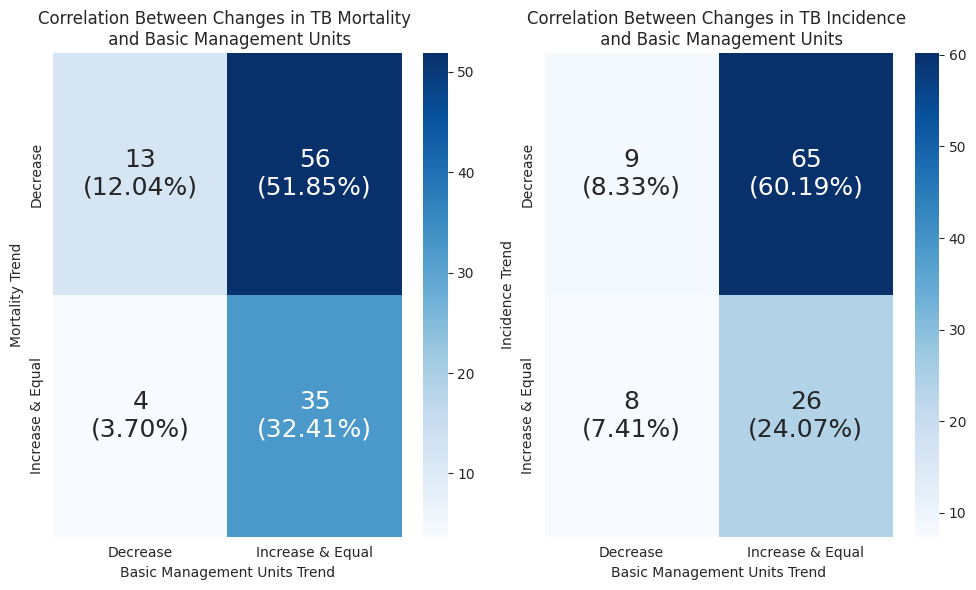

In [106]:
# filter the data to include only two time points, 2018 and 2022, to facilitate easy comparison of changes
burdcommu_filtered = burdcommu[burdcommu['year'].isin([2018, 2022])]

def trend(row):
    if row['2022'] >= row['2018']:
        return "Increase & Equal"
    else:
        return "Decrease"

pivoted = burdcommu_filtered.pivot(index='country', columns='year', values='bmu').reset_index()
pivoted.columns = pivoted.columns.map(str)
pivoted = pivoted.dropna()
pivoted['commu_unit_trend'] = pivoted.apply(trend, axis=1)

pivoted2 = burdcommu_filtered.pivot(index='country', columns='year', values='e_mort_100k').reset_index()
pivoted2.columns = pivoted2.columns.map(str)
pivoted2['e_mort_trend'] = pivoted2.apply(trend, axis=1)

pivoted3 = burdcommu_filtered.pivot(index='country', columns='year', values='e_inc_100k').reset_index()
pivoted3.columns = pivoted3.columns.map(str)
pivoted3['e_inc_trend'] = pivoted3.apply(trend, axis=1)

burdcommu_filtered = burdcommu[burdcommu['year'].isin([2022])]
pivoted = pivoted.merge(pivoted2[['country', 'e_mort_trend']], on='country', how='inner')
pivoted = pivoted.merge(pivoted3[['country', 'e_inc_trend']], on='country', how='inner')
pivoted = pivoted.merge(burdcommu_filtered[['g_whoregion','country']], on='country', how='inner')
pivoted = pivoted.drop(['2018','2022'], axis=1)

matrix1 = pivoted.groupby(['commu_unit_trend', 'e_mort_trend']).size().reset_index(name='count')
matrix1['percentage'] = (matrix1['count'] / len(pivoted)) * 100
matrix1['printout'] = matrix1.apply(lambda x: f"{x['count']}\n({x['percentage']:.2f}%)", axis=1)

matrix2 = pivoted.groupby(['commu_unit_trend', 'e_inc_trend']).size().reset_index(name='count')
matrix2['percentage'] = (matrix2['count'] / len(pivoted)) * 100
matrix2['printout'] = matrix2.apply(lambda x: f"{x['count']}\n({x['percentage']:.2f}%)", axis=1)

heatmap1 = matrix1.pivot(index='e_mort_trend', columns='commu_unit_trend', values='percentage')
annot1 = matrix1.pivot(index='e_mort_trend', columns='commu_unit_trend', values='printout')
heatmap2 = matrix2.pivot(index='e_inc_trend', columns='commu_unit_trend', values='percentage')
annot2 = matrix2.pivot(index='e_inc_trend', columns='commu_unit_trend', values='printout')

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

heatmap3 = sns.heatmap(heatmap1, annot=annot1, annot_kws={"size": 18}, fmt='', cmap="Blues", ax=axes[0])
axes[0].set_title('Correlation Between Changes in TB Mortality \n and Basic Management Units')
axes[0].tick_params(axis='y', labelrotation=90)
axes[0].tick_params(axis='x')
axes[0].set_xlabel('Basic Management Units Trend')
axes[0].set_ylabel('Mortality Trend')
cbar = heatmap3.collections[0].colorbar

heatmap4 = sns.heatmap(heatmap2, annot=annot2, annot_kws={"size": 18}, fmt='', cmap="Blues", ax=axes[1])
axes[1].set_title('Correlation Between Changes in TB Incidence \n and Basic Management Units')
axes[1].tick_params(axis='y', labelrotation=90)
axes[1].tick_params(axis='x')
axes[1].set_xlabel('Basic Management Units Trend')
axes[1].set_ylabel('Incidence Trend')
cbar2 = heatmap4.collections[0].colorbar

plt.tight_layout()
plt.show()

Basic engagement units, in particular, help African countries combat TB incidence and mortality.

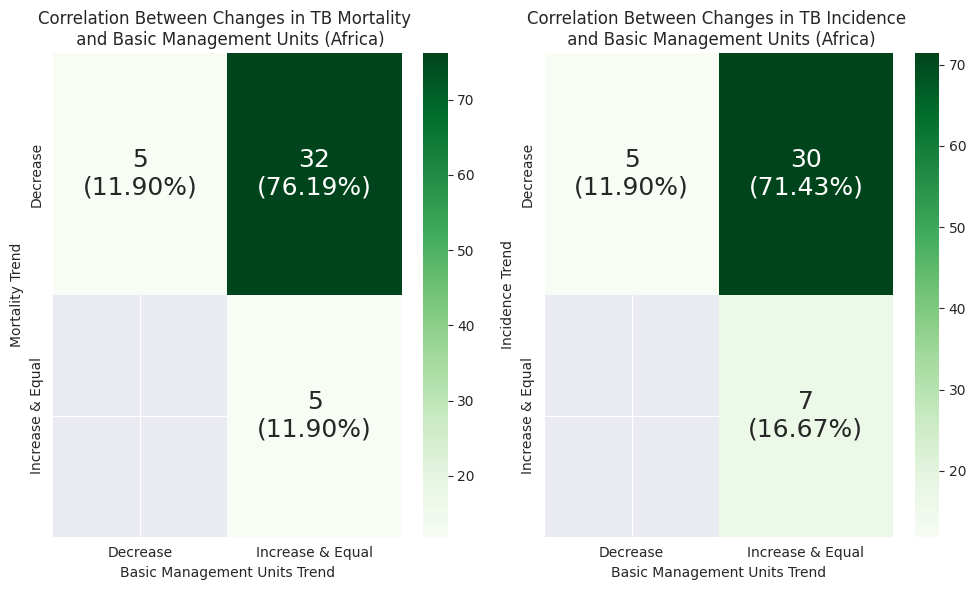

In [107]:
# filter the data to include only Africa's data
pivoted_africa = pivoted[pivoted['g_whoregion'] == 'Africa']

matrix1 = pivoted_africa.groupby(['commu_unit_trend', 'e_mort_trend']).size().reset_index(name='count')
matrix1['percentage'] = (matrix1['count'] / len(pivoted_africa)) * 100
matrix1['printout'] = matrix1.apply(lambda x: f"{x['count']}\n({x['percentage']:.2f}%)", axis=1)

matrix2 = pivoted_africa.groupby(['commu_unit_trend', 'e_inc_trend']).size().reset_index(name='count')
matrix2['percentage'] = (matrix2['count'] / len(pivoted_africa)) * 100
matrix2['printout'] = matrix2.apply(lambda x: f"{x['count']}\n({x['percentage']:.2f}%)", axis=1)

heatmap1 = matrix1.pivot(index='e_mort_trend', columns='commu_unit_trend', values='percentage')
annot1 = matrix1.pivot(index='e_mort_trend', columns='commu_unit_trend', values='printout')
heatmap2 = matrix2.pivot(index='e_inc_trend', columns='commu_unit_trend', values='percentage')
annot2 = matrix2.pivot(index='e_inc_trend', columns='commu_unit_trend', values='printout')

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

heatmap3 = sns.heatmap(heatmap1, annot=annot1, annot_kws={"size": 18}, fmt='', cmap="Greens", ax=axes[0])
axes[0].set_title('Correlation Between Changes in TB Mortality \n and Basic Management Units (Africa)')
axes[0].tick_params(axis='y', labelrotation=90)
axes[0].tick_params(axis='x')
axes[0].set_xlabel('Basic Management Units Trend')
axes[0].set_ylabel('Mortality Trend')
cbar = heatmap3.collections[0].colorbar

heatmap4 = sns.heatmap(heatmap2, annot=annot2, annot_kws={"size": 18}, fmt='', cmap="Greens", ax=axes[1])
axes[1].set_title('Correlation Between Changes in TB Incidence \n and Basic Management Units (Africa)')
axes[1].tick_params(axis='y', labelrotation=90)
axes[1].tick_params(axis='x')
axes[1].set_xlabel('Basic Management Units Trend')
axes[1].set_ylabel('Incidence Trend')
cbar2 = heatmap4.collections[0].colorbar

plt.tight_layout()
plt.show()

# **4. Conclusion**



Currently, the regions most affected by TB tend to have the least resources to address TB incidence and mortality. This indicates that our recommendations must be made with limited resources in mind. We also found that expenditures seem to have little correlation with TB outcomes, and believe our recommendations must go beyond simply increasing spending in TB-stricken nations. Our analysis also found that number of community engagement units seems to be negatively correlated with TB incidence rates and mortality, and the government involvement in TB globally is at best limited. We infer that more involvement in initiatives like basic engagement units would improve their effectiveness.

Knowing the above, we make the following recommendations:

## **4a. Insights and Recommendations**

### **1. Focus on Basic Engagement Unit Development**
**Insight:** We observed a significant disparity in community engagement efforts across different regions. In countries with high incidence and mortality rates, we noted an increase in BEUs over the past five years. Furthermore, most countries that increased their community engagement units have seen a decrease in TB incidence and mortality rates during this period. It is worth noting that even though the average number of community engagement units in African countries is the lowest globally, these efforts have still greatly helped Africa combat TB significantly.

**Recommendation:** Based on our findings, we now have confidence in stating that BEUs are an effective method for controlling TB. Therefore, increasing financial and operational support for community-driven TB initiatives like BEUs in Africa is a matter of urgency. This would encourage scaling up of grassroots campaigns involving community health workers, creating local partnerships to drive prevention, and investing in community education about TB symptoms, transmission, and treatment. Expanding engagement units in Africa could make it the next successful region to effectively combat TB.


### **2. Increased Ministry Involvement**

**Insight:** The governments around the world have an outsized share of their bureaucracy that are not involved in the national response to tuberculosis. We infer that this is a missed opportunity and could be the source of the struggles for poorly performing countries with respect to TB.

**Recommendation:** Both national and local governments should be responsible for establishing Basic Engagement Units and allocating the appropriate resources for the new BEUs. BEUs should remain in close contact with the government by reporting their findings and progress. In this way, BEU managers maintain ministry involvement in the unit.

### **3. Investments in Preventive Measures Based on Risk Profiles**

**Insight:** The EDA points to certain regions and demographic groups (e.g., age 0-14) that are especially vulnerable to TB. However, preventive investments, including those in diagnostic tools and early intervention, appear to be underfunded relative to treatment and post-diagnosis interventions.

**Recommendation:** Use the data to create risk profiles for vulnerable populations and allocate more resources toward preventive measures such as vaccination, early screening, and rapid response in at-risk populations. By creating country-specific TB risk profiles, health organizations can prioritize funding for preventive efforts in groups most likely to contract or succumb to TB. This will not only lower long-term treatment costs but also prevent the transmission of TB among these high-risk groups.

### **4. Cross-Sectoral Approach to Address Gaps in Resource Utilization**

**Insight:** Analysis of expenditure versus budget needs shows a significant gap in many regions, where countries fail to spend close to their projected budgets. Interestingly, some countries with high TB burdens are spending less than their allocated budgets yet still achieve notable improvements in outcomes.

**Recommendation:** Develop a multi-sectoral approach that integrates health, education, and social welfare sectors to optimize TB resource utilization. A cross-sectoral strategy would allow for shared budgets and resources, ensuring that funds are used more effectively to achieve broader health outcomes. This could involve coordinating with local ministries of health, education, and labor to maximize outreach, improve diagnostics, and enhance adherence to treatment regimens across the entire TB care continuum.

## **4b. Challenges**



### **Limited Data**

Across nearly all files, a significant amount of countries did not report certain data points. While a limited amount of data can be imputed, certain columns were not usable due to the lack of recorded information. This hindered our analysis at times.

Due to the lack of comprehensive data on community engagement, conducting further analysis is not possible. For example, when studying whether TB cases notified by community engagement units have changed, we encounter numerous missing values, even in the countries most affected by TB.

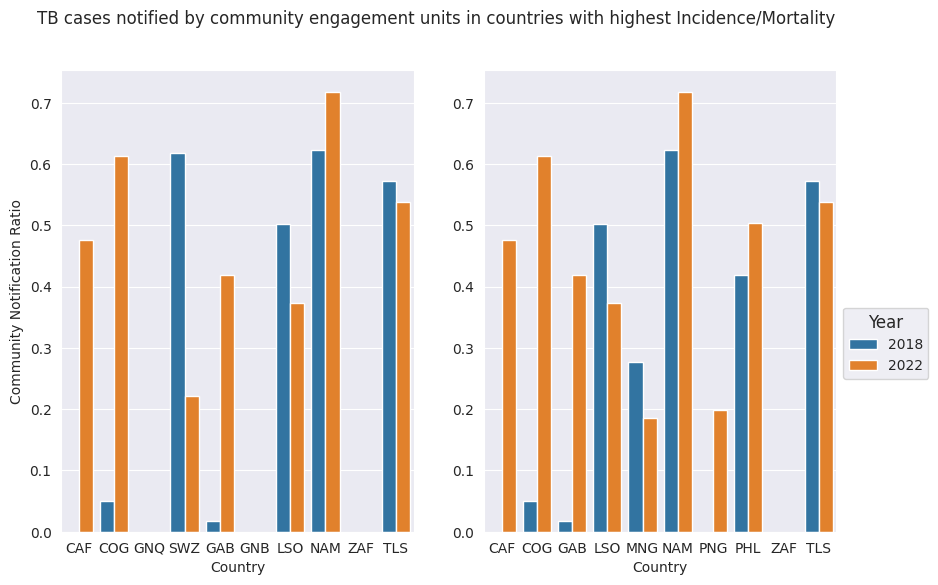

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

burdcommu_top_10_mort['commu_noti_ratio'] = burdcommu_top_10_mort['notified_ref']/burdcommu_top_10_mort['e_inc_num']
burdcommu_top_10_mort['commu_noti_ratio'] = burdcommu_top_10_mort['commu_noti_ratio'].apply(lambda x: 1 if x > 1 else x)
plt.suptitle('TB cases notified by community engagement units in countries with highest Incidence/Mortality')
plt.tick_params(axis='x', rotation=0)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Community Notification Ratio')
axes[1].set_xlabel('Country')
axes[1].set_ylabel(' ')

burdcommu_top_10_inc['commu_noti_ratio'] = burdcommu_top_10_inc['notified_ref']/burdcommu_top_10_inc['e_inc_num']
burdcommu_top_10_inc['commu_noti_ratio'] = burdcommu_top_10_inc['commu_noti_ratio'].apply(lambda x: 1 if x > 1 else x)
sns.barplot(data=burdcommu_top_10_mort, x='iso3', y='commu_noti_ratio', hue='year', width=0.8, ax = axes[0], legend=False)
sns.barplot(data=burdcommu_top_10_inc, x='iso3', y='commu_noti_ratio', hue='year', width=0.8, ax = axes[1])
axes[1].legend(title='Year', fontsize=10, title_fontsize=12, bbox_to_anchor=(1, 0.5))

plt.show()

### **Breadth of Data**

Because we selected many different files to investigate, it was difficult initially to focus our findings and recommendations to one area. Most of our time was spent identifying valuable information in each file and connecting it within other files.

##**4c. Generative AI Disclosure**

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

- **Background information on the dataset**: We used ChatGPT to give us background information on tuberculosis as it relates to our dataset. Most tables in our dataset had a large number of columns, each providing information about a certain factor of tuberculosis. The AI helped us understand what the information under these columns meant, and how it relates to tuberculosis incidences, treatments, budgets, and more.

- **Error Troubleshooting:** We used ChatGPT to explain errors in greater detail to us when we were stuck. We were able to combine our in-class knowledge with these explanations to debug our code.

- **Direction on handling null values:** We used ChatGPT to provide suggestions on the best approaches for filing null values in certain columns, such as using the mean,  or backward/forward fill.

- **Recommendations for types of visualizations:** We used ChatGPT to provide suggestions on the types of visualizations we should use to most clearly communicate the “story” we want to tell. The AI helped us make decisions on what packages we should use to make our visualizations (ex. Bokeh vs Seaborn)

**Customization of visualizations:** We used ChatGPT to help customize our visualizations to the specifications we wanted. Most of the packages for the plots we created have intense documentation for customizations that we have not yet memorized, so the AI was a great help in quickly helping make our visualizations not only aesthetically pleasing but clear and concise as well.


Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.


##**4d. References**

Plotly (2024). plotly.express.fig.update_layout [Documentation]. Plotly. https://plotly.com/python/reference/layout/

Plotly (2024). plotly.express.choropleth [Documentation]. Plotly. https://plotly.com/python/choropleth-maps/

Plotly. (n.d.). Sankey diagram. Retrieved October 15, 2024, from https://plotly.com/python/sankey-diagram/

Waskom, M. (2023). seaborn.lineplot [Documentation]. Seaborn. https://seaborn.pydata.org/generated/seaborn.lineplot.html

Waskom, M. (2023). seaborn.move_legend [Documentation]. Seaborn. https://seaborn.pydata.org/generated/seaborn.move_legend.html

World Health Organization. (2020). Community engagement: A health promotion guide for universal health coverage in the hands of the people. World Health Organization. https://www.who.int/publications/i/item/9789240010529

World Health Organization. (n.d.). Global Tuberculosis Programme: Data, profiles, and visualizations. World Health Organization. https://www.who.int/teams/global-tuberculosis-programme/data#profiles

World Health Organization. (2023). Tuberculosis. https://www.who.int/news-room/fact-sheets/detail/tuberculosis
